In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [27]:
letters= pd.read_csv('C:/Python/svm/letterdata.csv' , encoding='utf-8')

In [28]:
letters

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [29]:
X = np.array(letters.iloc[:,1:])
y = np.array(letters.letter)
print('클래스 레이블:',np.unique(y))

클래스 레이블: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


## splitting the dataset into separate training and test datasets

In [30]:
X_train, X_test, y_train, y_test =train_test_split(
    X,y,random_state=1,test_size=0.3, stratify=y)

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

## Standardizing

In [31]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

1. 다음 방법들을 사용하여 분류 문제를 풀어보고 서로 비교하여라.

 

a. 로지스틱 회귀방법

b. SVM

c. 랜덤 포레스트

d. k-NN


## logistic regression

In [32]:
clf1 = LogisticRegression(C=1.0, random_state=1, solver='lbfgs', multi_class='ovr')
clf1.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred = clf1.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1698


In [34]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.717


## SVM

In [35]:
clf2 = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
clf2.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
y_pred = clf2.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 240


In [37]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.960


## random forest

In [13]:
clf3 = RandomForestClassifier()
clf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
y_pred = clf3.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 251


In [15]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.958


## k-NN

In [16]:
clf4 =  KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
clf4.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
y_pred = clf4.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 384


In [18]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.936


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.98      0.97      0.97       237
           B       0.87      0.92      0.89       230
           C       0.95      0.94      0.94       221
           D       0.84      0.96      0.90       241
           E       0.92      0.94      0.93       230
           F       0.93      0.91      0.92       233
           G       0.89      0.91      0.90       232
           H       0.85      0.85      0.85       220
           I       0.96      0.95      0.95       226
           J       0.94      0.93      0.94       224
           K       0.91      0.86      0.89       222
           L       0.96      0.96      0.96       228
           M       0.97      0.96      0.97       238
           N       0.96      0.94      0.95       235
           O       0.91      0.96      0.93       226
           P       0.94      0.95      0.94       241
           Q       0.97      0.94      0.95       235
           R       0.93    

각 분류기의 성능은 SVM, random forest, k-NN, logistic regression 순으로 좋다.

2. 로지스틱 회귀방법에서 L1 규제를 통한 특성 선택을 시도하고, 랜덤 포레스트를 사용하여 특성 중요도를 계산하고

서로 비교하여라.


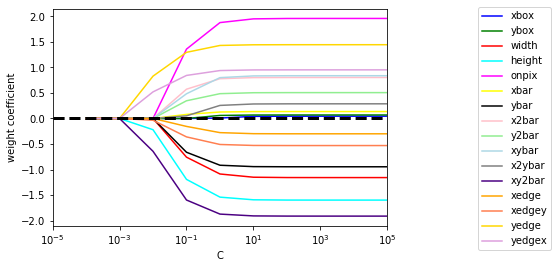

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange','coral','gold','plum']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=letters.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

In [21]:
lr.coef_

array([[-1.44225072e+00,  4.90388954e-01,  1.88135218e+00,
         1.02646807e-01, -1.24880847e+00,  1.10154174e+00,
        -8.37376199e-01, -1.34372389e+00, -2.53451351e+00,
        -1.47134860e+00, -1.06353253e+00,  1.30013888e+00,
        -3.74503443e-01, -2.23648032e-01,  7.11675725e-01,
        -1.17384272e+00],
       [ 4.49768276e-02,  6.82734608e-02, -1.15758754e+00,
        -1.59849288e+00,  1.95874836e+00,  1.35660096e-01,
        -9.46096229e-01,  8.02793934e-01,  5.06195922e-01,
         8.37176178e-01,  2.86990371e-01, -1.91216051e+00,
        -3.00157486e-01, -5.30414310e-01,  1.44443903e+00,
         9.51888736e-01],
       [ 1.07117695e-01,  6.93753574e-01, -3.58813241e-01,
        -1.10439751e+00,  1.63708583e-01,  2.54460206e-01,
         1.08648200e+00,  9.44981426e-01,  9.34801945e-01,
         9.92829704e-01,  6.79175051e-01,  2.24309717e+00,
         7.93694379e-01,  6.46210719e-01,  2.26165699e-02,
         9.64514578e-01],
       [ 6.54581002e-02,  7.63679129e

In [22]:
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.7307142857142858
Test accuracy: 0.7165


변수 yedge, height, yedgex, xy2bar 들이 가중치가 높은 변수라고 볼 수 있다.

 1) xedge                          0.117627
 2) yedge                          0.099983
 3) y2bar                          0.092682
 4) xy2bar                         0.085247
 5) x2bar                          0.083833
 6) x2ybar                         0.080698
 7) xedgey                         0.073263
 8) xybar                          0.072487
 9) ybar                           0.068951
10) yedgex                         0.053845
11) xbar                           0.052704
12) onpix                          0.026875
13) ybox                           0.025452
14) width                          0.023397
15) xbox                           0.022285
16) height                         0.020671


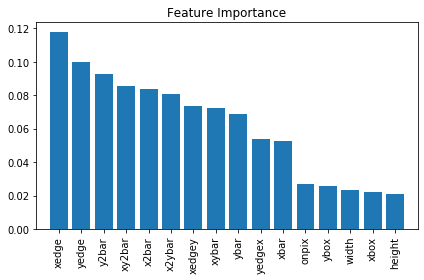

In [23]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = letters.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [24]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.08, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 6


In [25]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) xedge                          0.117627
 2) yedge                          0.099983
 3) y2bar                          0.092682
 4) xy2bar                         0.085247
 5) x2bar                          0.083833
 6) x2ybar                         0.080698


변수 xedge, yedge, y2bar, xy2bar, x2bar, x2ybar 순으로 가중치가 높은 변수라고 볼 수 있다.